In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re

In [2]:
pwd

'C:\\Users\\A533197\\OneDrive - ATOS\\ATOS (E)\\Learning\\E&ICT IIT Guwahati\\CAPSTONE PROJECT 2'

In [3]:
zomato_df = pd.read_csv('zomato.csv')
zomato_df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
zomato_df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
#Dropping irrelevant columns 
zom1_df=zomato_df.drop(['url','dish_liked','phone'],axis=1)

In [7]:
zom1_df.head(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
#counting number of duplicate values
zom1_df.duplicated().sum()

43

In [9]:
zom1_df[zom1_df.duplicated()]

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
596,"572, 30th Main, 3rd Stage, Banashankari, Banga...",My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...","['MTH Signature Soup', 'Minestrone Veg', 'Broc...",Dine-out,Banashankari
7599,"17, Thubarahalli Village, Hobli, Varthur Main ...",Nawab Di Biryani,Yes,No,NEW,0,Whitefield,"Takeaway, Delivery","Biryani, Mughlai",400,"[('Rated 4.0', 'RATED\n Ordered paneer tikka ...","['Paneer Tikka Biryani', 'Veg Lucknowi Biryani...",Delivery,Brookefield
9464,"744, 13th Main, 7th Cross, BTM 2nd Stage, BTM,...",Vyanjan,Yes,No,3.9/5,201,BTM,Quick Bites,"North Indian, Street Food",300,"[('Rated 3.0', ""RATED\n Nice place, it's for ...","['Jeera Rice', 'Khichdi', 'Plain Tawa Roti', '...",Delivery,BTM
9466,"607, First Floor, 80 Feet Road, 6th Block, Kor...",Carrots,Yes,Yes,4.1/5,600,Koramangala 6th Block,Casual Dining,"Italian, North Indian, Healthy Food, Desserts","1,100","[('Rated 5.0', ""RATED\n It's the first vegan ...",[],Delivery,BTM
9467,"Building 58, New 3, A Main Road Marenahalli, J...",Eatsomnia,Yes,No,NEW,0,JP Nagar,Delivery,"North Indian, South Indian, Chinese, Continental",500,"[('Rated 1.0', ""RATED\n The worst food I ate ...",[],Delivery,BTM
9468,"6th Cross Road, Koramangala 6th Block, Bangalore",Rolls & Co,Yes,No,3.9/5,213,Koramangala 6th Block,Quick Bites,"Burger, Beverages, Rolls",400,"[('Rated 2.0', 'RATED\n Order : Peri Peri Fri...",[],Delivery,BTM
9469,"10, Opposite Forum Mall, Taverekere, Suddagunt...",Fogg,No,Yes,NEW,0,BTM,Quick Bites,"Fast Food, Chinese",200,"[('Rated 5.0', 'RATED\n Seafood soup - A Thai...",[],Delivery,BTM
9470,"Koramangala 1st Block, Bangalore",The Paratha Stories,Yes,No,3.3/5,36,Koramangala 1st Block,Delivery,North Indian,400,"[('Rated 3.0', 'RATED\n There is enough scope...",[],Delivery,BTM
9471,"29, 7th Cross Road, Bhavani Nagar, Suddagunte ...",Mycakeshop,Yes,No,NaN,0,BTM,Bakery,"Bakery, Desserts",300,"[('Rated 5.0', 'RATED\n I loved cake nice tru...","['Red Velvet Cake', 'Truffle Chocolate Cake', ...",Delivery,BTM
9549,"51, 5th Main, 60 Feet Road, BNG Homestay Build...",Bisimillah Biriyani,No,No,3.5/5,11,BTM,Quick Bites,"Biryani, Fast Food",300,"[('Rated 4.0', 'RATED\n Very delicious food @...",[],Delivery,BTM


In [10]:
#Droppping Duplicated rows after removing certain columns
zom1_df.drop_duplicates(inplace=True)

In [11]:
zom1_df.shape

(51674, 14)

In [12]:
zom1_df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [13]:
zom1_df['name'].value_counts() #This shows that same restaurant occurs multiple times

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Hyderabadi Biryaani Hub                                     1
Lassi Mania                                                 1
Coastal Biryani Paradise                                    1
Momo Shop                                                   1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8792, dtype: int64

In [14]:
zom1_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
#Dataframe where rate and reviews_list both are null
zom1_df[((zom1_df.rate == '-') | (zom1_df.rate == 'NEW')) & (zom1_df.reviews_list == '[]')]

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
75,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,[],[],Delivery,Banashankari
130,"28, 4th Cross Road, Dwaraka Nagar, Banashankar...",Roll Magic Fast Food,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Biryani, Rolls, Chinese",200,[],[],Delivery,Banashankari
131,"3/16, 22 Main Road, Magenta Block, PES College...",Foodlieious Multi Cuisine,No,No,NEW,0,Banashankari,Quick Bites,North Indian,100,[],[],Delivery,Banashankari
132,"17/1, Ramaiah Garden, Kadirenahalli Circle, Dr...",Thanishka Nati And Karavali Style,No,No,NEW,0,Banashankari,Quick Bites,"Biryani, Fast Food",400,[],[],Delivery,Banashankari
143,"Bhuvaneshwari Nagar BSK 3RD Stage, Banashankar...",Melting Melodies,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Pizza, Fast Food",100,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51020,"2/3, Immadihalli Road, Near Balaji Sunflower A...",Raj Sweets,No,No,NEW,0,Whitefield,Sweet Shop,"Mithai, Street Food",200,[],[],Desserts,Whitefield
51575,"55, Sapthagiri Layout, Government College Road...",PR Kitchen,No,No,NEW,0,Whitefield,Quick Bites,"South Indian, Chinese",350,[],[],Dine-out,Whitefield
51576,"Splendid Times Square, Pattandur Agrahara, Whi...",The Parrot House,No,No,NEW,0,Whitefield,Quick Bites,"North Indian, Sandwich, Beverages",200,[],[],Dine-out,Whitefield
51585,"Near Rama Temple, Immadihalli Road, Whitefield...",Wow Tiffin Food,No,No,NEW,0,Whitefield,Quick Bites,North Indian,200,[],[],Dine-out,Whitefield


In [16]:
#Rows where rate and reviews_list both are null
zom1_df[((zom1_df.rate == '-') | (zom1_df.rate == 'NEW')) & (zom1_df.reviews_list == '[]')].shape

(1197, 14)

In [17]:
#Removing rows with rate as - and NEW from dataframe.
zom2_df=zom1_df.loc[((zom1_df.rate != '-') | (zom1_df.rate != 'NEW')) & (zom1_df.reviews_list != '[]')].reset_index(drop=True)
zom2_df

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44081,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
44082,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
44083,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
44084,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [18]:
zom2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44086 entries, 0 to 44085
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      44086 non-null  object
 1   name                         44086 non-null  object
 2   online_order                 44086 non-null  object
 3   book_table                   44086 non-null  object
 4   rate                         41590 non-null  object
 5   votes                        44086 non-null  int64 
 6   location                     44086 non-null  object
 7   rest_type                    43929 non-null  object
 8   cuisines                     44071 non-null  object
 9   approx_cost(for two people)  43793 non-null  object
 10  reviews_list                 44086 non-null  object
 11  menu_item                    44086 non-null  object
 12  listed_in(type)              44086 non-null  object
 13  listed_in(city)              44

In [19]:
zom2_df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           2496
votes                             0
location                          0
rest_type                       157
cuisines                         15
approx_cost(for two people)     293
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [20]:
zom2_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '3.2 /5', '3.1 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '2.5 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
#Removing slash from rate
zom2_df['rate']=zom2_df['rate'].str.replace('/5','')

In [22]:
#Removing space from rate
zom2_df['rate']=zom2_df['rate'].str.replace(' ','')

In [23]:
zom2_df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '-',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [24]:
#Replacing NEW from rate with Null
zom2_df['rate'].replace('NEW',np.nan,inplace=True)

In [25]:
#Replacing - from rate with Null
zom2_df['rate'].replace('-',np.nan,inplace=True)

In [26]:
#Replacing - from rate with Null
#zom2_df['rate']=zom2_df['rate'].str.replace('',np.nan)

In [27]:
zom2_df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', nan, '2.9', '3.5', '2.6',
       '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [28]:
#TypeCasting rate column into float from object
zom3_df=zom2_df.astype({'rate':'float64'},copy=True)
zom3_df.dtypes

address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [29]:
zom3_df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [30]:
zom3_df.sample(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
31401,"63, 5th Block, Jyoti Nivas College Road, Koram...",WTF,Yes,No,4.1,96,Koramangala 5th Block,Cafe,"Cafe, Continental",600,"[('Rated 5.0', ""RATED\n Visited today for eve...","['Margherita Pizza', 'BBQ Chicken Pizza', 'Chi...",Dine-out,Koramangala 7th Block
3174,"10th Main, Hanumanthanagar, 50 Feet Road, Phas...",Coffee Bytes,No,No,3.1,6,Banashankari,Quick Bites,"Fast Food, South Indian",100,"[('Rated 3.5', ""RATED\n I vist here almost ev...",[],Dine-out,Basavanagudi
5520,"18, Bowring Hospital Road, Shivajinagar, Banga...",Shilpa Veg,No,No,3.6,37,Shivajinagar,Quick Bites,"South Indian, Street Food, Beverages, Desserts",250,"[('Rated 3.0', 'RATED\n A decent place. Overa...",[],Dine-out,Brigade Road
22046,"6th Main Road, 1st Block, Kadugondanahalli, HB...",Creme Bliss,Yes,No,3.9,42,HBR Layout,Bakery,"Bakery, Desserts",350,"[('Rated 5.0', 'RATED\n This is the best plac...",[],Desserts,Kammanahalli
17243,"88, KK Centre, Jyoti Nivas College Road, Koram...",Mani's Dum Biryani,Yes,No,3.9,778,Koramangala 5th Block,Casual Dining,"Biryani, Kebab",750,"[('Rated 1.0', 'RATED\n The chicken was rubbe...","['Veg Biryani', 'Egg Biryani', 'Chicken Biryan...",Delivery,Jayanagar


In [31]:
zom3_df[zom3_df['rate'].isnull()].shape

(3568, 14)

In [32]:
#Null Value in rate but review list has value
zom3_df[(zom3_df['rate'].isnull()) & (zom3_df.reviews_list == '[]')].shape

(0, 14)

In [33]:
#Imputing 
zom3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44086 entries, 0 to 44085
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      44086 non-null  object 
 1   name                         44086 non-null  object 
 2   online_order                 44086 non-null  object 
 3   book_table                   44086 non-null  object 
 4   rate                         40518 non-null  float64
 5   votes                        44086 non-null  int64  
 6   location                     44086 non-null  object 
 7   rest_type                    43929 non-null  object 
 8   cuisines                     44071 non-null  object 
 9   approx_cost(for two people)  43793 non-null  object 
 10  reviews_list                 44086 non-null  object 
 11  menu_item                    44086 non-null  object 
 12  listed_in(type)              44086 non-null  object 
 13  listed_in(city) 

In [34]:
zom3_df['name'].value_counts() #This shows that same restaurant occurs multiple times

Cafe Coffee Day                              89
Onesta                                       84
Empire Restaurant                            71
Just Bake                                    68
Polar Bear                                   65
                                             ..
Amaravathi Andhra Style Family Restaurant     1
New Hotel Prashanth                           1
Grand Taj Durbar                              1
Makaranda                                     1
SeeYa Restaurant                              1
Name: name, Length: 7041, dtype: int64

In [35]:
#Getting Mean Rating of the Restaurants
z1=pd.DataFrame(zom3_df.groupby(['name']).mean()['rate']).round(2)
z1=z1.rename(columns={'rate':'Mean Rating'})
z1

,Mean Rating
name,
#FeelTheROLL,3.40
#L-81 Cafe,3.90
#Vibes Restro,NaN
#refuel,3.70
1 Fahreheit,NaN
...,...
iFruit Live Ice Creams,3.40
iSpice Resto Cafe,3.70
nu.tree,4.31


In [36]:
z1.isnull().sum()

Mean Rating    638
dtype: int64

In [37]:
#Merging MeanRating of restaurants with datafarame
zom3_df=zom3_df.merge(z1,how='outer',on='name')

In [38]:
zom3_df.sample(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Mean Rating
18390,"52, Brigade Road, Haridevpur, Shanthala Nagar,...",Cafe Azzure,Yes,Yes,4.3,2664,MG Road,Cafe,"Cafe, Continental, Italian, Burger","1,200","[('Rated 4.0', 'RATED\n Brunch time hea !! An...","['Grilled Chicken Sandwich', 'Peri Peri Chicke...",Dine-out,Brigade Road,4.24
14794,"9, N-W Corner, 4th Cross, HRBR Layout, 2nd Blo...",Chaai Resto,Yes,No,3.9,97,Kalyan Nagar,Cafe,"Cafe, Fast Food, Beverages",350,"[('Rated 4.0', 'RATED\n Sunday morning me and...","['Desi Chai', 'Masala Chai', 'Ginger Chai', 'D...",Dine-out,Kammanahalli,3.68
31391,"38, 11th Main Road, KEB Colony, 1st Stage, BTM...",Chicken Corner,Yes,No,3.7,26,BTM,Quick Bites,"Biryani, North Indian, Fast Food, Chinese",400,"[('Rated 3.0', 'RATED\n Ordered a zinger burg...",[],Delivery,Koramangala 6th Block,3.62
966,"78, 21st Main Road, Near BDA Complex, 2nd Stag...",Roving Feast,No,No,4.0,1047,Banashankari,Quick Bites,"Italian, Continental, Fast Food, Chinese, Momos",450,"[('Rated 5.0', ""RATED\n Momooooooooooo..........",[],Delivery,Banashankari,4.00
28110,"102/A, KIADB Export Promotion Industrial Area,...",Mayura Vybhava,No,No,3.1,12,Whitefield,Quick Bites,"South Indian, North Indian, Chinese, Street Food",250,"[('Rated 4.0', 'RATED\n I loved the food at t...",[],Dine-out,Whitefield,3.15


In [39]:
zom3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44086 entries, 0 to 44085
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      44086 non-null  object 
 1   name                         44086 non-null  object 
 2   online_order                 44086 non-null  object 
 3   book_table                   44086 non-null  object 
 4   rate                         40518 non-null  float64
 5   votes                        44086 non-null  int64  
 6   location                     44086 non-null  object 
 7   rest_type                    43929 non-null  object 
 8   cuisines                     44071 non-null  object 
 9   approx_cost(for two people)  43793 non-null  object 
 10  reviews_list                 44086 non-null  object 
 11  menu_item                    44086 non-null  object 
 12  listed_in(type)              44086 non-null  object 
 13  listed_in(city) 

In [40]:
zom3_df[(zom3_df['Mean Rating'].isnull()) & (zom3_df['rate'].isnull())]

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Mean Rating
1694,"Near Seetha Circle, Vivekananda Park Road, Gir...",Cake Bite,No,No,NaN,0,Banashankari,Bakery,Bakery,300,"[('Rated 1.0', ""RATED\n worst service & only ...",[],Delivery,Banashankari,NaN
1695,"Near Seetha Circle, Vivekananda Park Road, Gir...",Cake Bite,No,No,NaN,0,Banashankari,Bakery,Bakery,300,"[('Rated 1.0', ""RATED\n worst service & only ...",[],Desserts,Banashankari,NaN
1696,"3148, 2nd Cross, 4th Phase Girinagar, Near Hos...",Wood Stove,No,No,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,150,"[('Rated 5.0', 'RATED\n Wow this food is grea...",[],Delivery,Banashankari,NaN
1724,"487, Cauvery Complex, S.B.M Colony, 80 Feet Ro...",Kaumudis Juoice,No,No,NaN,0,Banashankari,"Beverage Shop, Quick Bites","Beverages, Fast Food, Juices",150,"[('Rated 5.0', ""RATED\n Excellent sandwich so...",[],Delivery,Banashankari,NaN
1725,"487, Cauvery Complex, S.B.M Colony, 80 Feet Ro...",Kaumudis Juoice,No,No,NaN,0,Banashankari,"Beverage Shop, Quick Bites","Beverages, Fast Food, Juices",150,"[('Rated 5.0', ""RATED\n Excellent sandwich so...",[],Dine-out,Banashankari,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44063,"Channasandra Main Road, Kadugodi, Whitefield, ...",New Shalimar Hotel,No,No,NaN,0,Whitefield,Quick Bites,"North Indian, Biryani",250,"[('Rated 5.0', 'RATED\n Unbelievable but the ...",[],Dine-out,Whitefield,NaN
44064,"Food Court 2, Concourse Tech Park Mall, ITPL, ...",Homies,No,No,NaN,0,Whitefield,Food Court,Chinese,600,"[('Rated 3.5', 'RATED\n I had the bread pakod...",[],Dine-out,Whitefield,NaN
44065,"Beside Municipal Office, Old Bus Stop, Hoskote...",Khader Bhai Hotel,No,No,NaN,0,Whitefield,Quick Bites,North Indian,300,"[('Rated 5.0', ""RATED\n Amazing food experien...",[],Dine-out,Whitefield,NaN
44066,"Near MVJ College, Channasandra Main Road, Whit...",SRF Family Restaurant,No,No,NaN,0,Whitefield,Quick Bites,"Chinese, North Indian",250,"[('Rated 2.0', 'RATED\n The food quality and ...",[],Dine-out,Whitefield,NaN


In [41]:
zom3_df[(zom3_df['Mean Rating'].isnull())].shape

(2255, 15)

In [42]:
#Dropping rows where mean rating and rate are nulls
zom3_df.dropna(subset=['Mean Rating'],inplace=True)

In [43]:
zom3_df=zom3_df.reset_index(drop=True)

In [44]:
zom3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41831 entries, 0 to 41830
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      41831 non-null  object 
 1   name                         41831 non-null  object 
 2   online_order                 41831 non-null  object 
 3   book_table                   41831 non-null  object 
 4   rate                         40518 non-null  float64
 5   votes                        41831 non-null  int64  
 6   location                     41831 non-null  object 
 7   rest_type                    41680 non-null  object 
 8   cuisines                     41820 non-null  object 
 9   approx_cost(for two people)  41574 non-null  object 
 10  reviews_list                 41831 non-null  object 
 11  menu_item                    41831 non-null  object 
 12  listed_in(type)              41831 non-null  object 
 13  listed_in(city) 

In [45]:
zom3_df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           1313
votes                             0
location                          0
rest_type                       151
cuisines                         11
approx_cost(for two people)     257
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
Mean Rating                       0
dtype: int64

In [46]:
zom3_df['Mean Rating'].unique()

array([4.12, 4.1 , 3.8 , 3.7 , 3.6 , 4.41, 4.  , 4.2 , 3.9 , 3.1 , 3.  ,
       2.85, 3.26, 3.2 , 3.3 , 3.38, 2.83, 3.95, 3.96, 3.93, 2.8 , 4.06,
       4.03, 3.82, 3.57, 3.56, 3.63, 3.81, 4.47, 3.83, 3.61, 3.42, 4.38,
       4.02, 3.54, 3.68, 3.66, 3.84, 3.62, 2.7 , 2.9 , 3.89, 3.5 , 3.4 ,
       4.34, 3.79, 3.72, 3.23, 3.36, 3.85, 3.48, 4.04, 3.87, 3.92, 3.69,
       3.75, 4.19, 3.65, 4.07, 3.73, 3.27, 4.6 , 4.08, 3.33, 3.35, 3.34,
       4.5 , 3.88, 3.64, 4.3 , 3.86, 2.5 , 4.17, 3.76, 3.39, 3.55, 3.97,
       3.14, 3.71, 3.47, 3.98, 3.24, 3.46, 4.23, 2.55, 3.78, 2.6 , 4.01,
       3.51, 3.18, 3.28, 3.08, 3.91, 3.77, 3.13, 3.02, 3.43, 3.29, 4.14,
       3.94, 3.19, 4.11, 3.59, 3.22, 4.4 , 4.05, 2.77, 4.7 , 4.49, 4.32,
       3.32, 2.71, 4.09, 4.28, 3.67, 3.41, 2.96, 2.95, 2.63, 3.58, 2.86,
       3.52, 4.18, 4.59, 3.99, 4.37, 2.98, 3.05, 3.06, 2.67, 3.45, 4.35,
       4.21, 3.49, 3.12, 3.74, 3.37, 2.68, 2.91, 3.53, 3.07, 3.21, 4.15,
       3.44, 3.15, 2.94, 3.09, 2.48, 3.31, 3.03, 2.

In [47]:
#Text PreProcessing

In [48]:
zom3_df.loc[:,('name','reviews_list','cuisines')]

,name,reviews_list,cuisines
0,Jalsa,"[('Rated 4.0', 'RATED\n A beautiful place to ...","North Indian, Mughlai, Chinese"
1,Jalsa,"[('Rated 4.0', 'RATED\n A beautiful place to ...","North Indian, Mughlai, Chinese"
2,Jalsa,"[('Rated 4.0', 'RATED\n A beautiful place to ...","North Indian, Mughlai, Chinese"
3,Jalsa,"[('Rated 4.0', 'RATED\n A beautiful place to ...","North Indian, Mughlai, Chinese"
4,Jalsa,"[('Rated 4.0', 'RATED\n A beautiful place to ...","North Indian, Mughlai, Chinese"
...,...,...,...
41826,Chime - Sheraton Grand Bengaluru Whitefield Ho...,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Finger Food
41827,The Nest - The Den Bengaluru,"[('Rated 5.0', 'RATED\n Great ambience , look...","Finger Food, North Indian, Continental"
41828,The Nest - The Den Bengaluru,"[('Rated 5.0', 'RATED\n Great ambience , look...","Finger Food, North Indian, Continental"
41829,Nawabs Empire,"[('Rated 1.0', 'RATED\n This place is not at ...","North Indian, Chinese, Arabian, Momos"


In [49]:
zom3_df.loc[0,'reviews_list']

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [50]:
#Lower Case conversion
zom3_df['reviews_list']=zom3_df['reviews_list'].str.lower()
zom3_df['reviews_list']

0        [('rated 4.0', 'rated\n  a beautiful place to ...
1        [('rated 4.0', 'rated\n  a beautiful place to ...
2        [('rated 4.0', 'rated\n  a beautiful place to ...
3        [('rated 4.0', 'rated\n  a beautiful place to ...
4        [('rated 4.0', 'rated\n  a beautiful place to ...
                               ...                        
41826    [('rated 4.0', 'rated\n  nice and friendly pla...
41827    [('rated 5.0', 'rated\n  great ambience , look...
41828    [('rated 5.0', 'rated\n  great ambience , look...
41829    [('rated 1.0', 'rated\n  this place is not at ...
41830    [('rated 4.0', 'rated\n  good food, take bit t...
Name: reviews_list, Length: 41831, dtype: object

In [51]:
#Basic Cleaning e.g: URL,ctrl/ASCII char,spl char
def cleanText(Zomtext):
    Zomtext = re.sub('http\S+\s*', '', Zomtext) # removing URL
    Zomtext = re.sub('#\S+', '', Zomtext)
    Zomtext = re.sub('@\S+', '', Zomtext)
    Zomtext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), '', Zomtext)
    Zomtext = re.sub(r'[^\x00-\x7f]', r'', Zomtext)
    Zomtext = re.sub(r'[^\x00-\x8f]', r'', Zomtext)
    Zomtext = re.sub(r'[^\x00-\x9f]', r'', Zomtext)
    Zomtext = re.sub('\s+', ' ', Zomtext)
    Zomtext = re.sub('\n+', '', Zomtext)
    #Zomtext = re.sub(r'\x+', '', Zomtext)
    return Zomtext

In [52]:
#Calling function
zom3_df['reviews_list']=zom3_df['reviews_list'].apply(cleanText)
zom3_df['reviews_list']

0        rated 40 rated\n a beautiful place to dine int...
1        rated 40 rated\n a beautiful place to dine int...
2        rated 40 rated\n a beautiful place to dine int...
3        rated 40 rated\n a beautiful place to dine int...
4        rated 40 rated\n a beautiful place to dine int...
                               ...                        
41826    rated 40 rated\n nice and friendly place and s...
41827    rated 50 rated\n great ambience looking nice g...
41828    rated 50 rated\n great ambience looking nice g...
41829    rated 10 rated\n this place is not at all good...
41830    rated 40 rated\n good food take bit time to ge...
Name: reviews_list, Length: 41831, dtype: object

In [53]:
zom3_df.loc[0,'reviews_list']

'rated 40 rated\\n a beautiful place to dine inthe interiors take you back to the mughal era the lightings are just perfectwe went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at allthe only complaint is that the breads could have been betterwould surely like to come here again rated 40 rated\\n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout\\ncheers rated 20 rated\\n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala ca

In [54]:
zom31_df=zom3_df['reviews_list']

In [55]:
zom31_df[0]

'rated 40 rated\\n a beautiful place to dine inthe interiors take you back to the mughal era the lightings are just perfectwe went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at allthe only complaint is that the breads could have been betterwould surely like to come here again rated 40 rated\\n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout\\ncheers rated 20 rated\\n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala ca

In [56]:
#Basic Cleaning e.g: char,spl char
def cleanText2(Zomtext):
    Zomtext = re.sub(r'\\n+', r'', Zomtext)
    Zomtext = re.sub(r'\\x+', r'', Zomtext)
    Zomtext = re.sub(r'\d+', '', Zomtext) #removing all numbers
    return Zomtext

In [57]:
zom3_df['reviews_list']=zom3_df['reviews_list'].apply(cleanText2)
zom3_df['reviews_list']

0        rated  rated a beautiful place to dine inthe i...
1        rated  rated a beautiful place to dine inthe i...
2        rated  rated a beautiful place to dine inthe i...
3        rated  rated a beautiful place to dine inthe i...
4        rated  rated a beautiful place to dine inthe i...
                               ...                        
41826    rated  rated nice and friendly place and staff...
41827    rated  rated great ambience looking nice good ...
41828    rated  rated great ambience looking nice good ...
41829    rated  rated this place is not at all good we ...
41830    rated  rated good food take bit time to get th...
Name: reviews_list, Length: 41831, dtype: object

In [58]:
zom3_df.loc[5,'reviews_list']

'rated  rated super ambiencegreat food with spicy touchaverage servicebest for couplesfamilygood musicpaneer items are at best moctails were good too rated  rated first hand experience for being a gold member of zomato started with mix veg badami soup which was tasty with a crunch of bafam slivers too much of pepper for appetising the pallate followed it with khumbh starter which too was spicy then we had chef special falguni which was truly amazing with each vegetable having its share of taste methi dal makahni naan and lacxha paratha to go with it good ambience dimly lit and stream of people keep coming in overall good nothing to talk about the gold member and benefits rated  rated a beautiful place to dine inthe interiors take you back to the mughal era the lightings are just perfectwe went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at allthe only complaint is that the breads could have been betterwou

In [59]:
zom3_df

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,rated rated a beautiful place to dine inthe i...,[],Buffet,Banashankari,4.12
1,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,rated rated a beautiful place to dine inthe i...,[],Delivery,Banashankari,4.12
2,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,rated rated a beautiful place to dine inthe i...,[],Dine-out,Banashankari,4.12
3,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,rated rated a beautiful place to dine inthe i...,[],Buffet,Basavanagudi,4.12
4,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,rated rated a beautiful place to dine inthe i...,[],Delivery,Basavanagudi,4.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41826,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",rated rated nice and friendly place and staff...,[],Pubs and bars,Whitefield,4.30
41827,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental","1,500",rated rated great ambience looking nice good ...,[],Dine-out,Whitefield,3.40
41828,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental","1,500",rated rated great ambience looking nice good ...,[],Pubs and bars,Whitefield,3.40
41829,"107/PA, ITPL Main Road, Whitefield, Bangalore",Nawabs Empire,No,No,3.2,5,"ITPL Main Road, Whitefield",Quick Bites,"North Indian, Chinese, Arabian, Momos",300,rated rated this place is not at all good we ...,[],Dine-out,Whitefield,3.20


In [60]:
#removal of stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A533197\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A533197\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
stopwordList = set(stopwords.words('english'))
def removeStopWords(Zomtext):
    tokens = word_tokenize(Zomtext)
    tokens = [token.strip() for token in tokens]
    filteredTokens = [token for token in tokens if token.lower() not in stopwordList]
    filteredText = ' '.join(filteredTokens)
    return filteredText

In [62]:
print(stopwordList)

{'his', 'did', 'an', "doesn't", "hadn't", "haven't", 'who', 'ma', "won't", 'he', 'other', 'you', 'our', 'only', 'own', 'mightn', "needn't", 'shan', 's', 'where', 'both', 't', 'haven', 'shouldn', 'here', "didn't", 'its', 'don', 'her', 'have', 've', 'hers', 'their', 'and', "that'll", 'more', 'aren', "mustn't", 'when', 'hadn', "you'd", 'while', 'after', 'me', 'was', 'didn', "you're", 'up', "should've", 'your', "wasn't", "couldn't", 'my', 'having', "wouldn't", 'the', 'below', 'm', 'theirs', 'wasn', 'i', 'few', 'what', 'had', 'than', 'or', 'mustn', 'so', 'before', 'out', "isn't", 'she', 'in', 'about', 'any', "shouldn't", "you'll", 'does', 'very', 'o', 'hasn', 'ourselves', 'into', 'doesn', 'why', 'too', 'because', "you've", 'under', 'between', 'further', 'all', 'ain', 'as', 'but', 'll', 'isn', 'down', 'above', 'some', "weren't", 'from', 'again', 'over', 'it', 'no', 'on', 'been', 'through', 'if', 'to', "shan't", 'him', 'now', 'weren', 'should', 'not', 'being', 'nor', "don't", 'them', 'themsel

In [63]:
#Calling removeStopword function
zom3_df['reviews_list'] = zom3_df['reviews_list'].apply(removeStopWords)

In [64]:
zom3_df.loc[6,'reviews_list']

'rated rated pretty decent place eat mughal cuisine everything inside outside restaurant pretty well done food good well jalsa special chicken kebab really good ordered ghost biryani mutton cooked perfection biryani spicy liking lastly gajar ka halwa made spicy taste left biryani recommendable experience rated rated went place sunday evening family dinner place royal ambience ordered veg food ordered cream veg soup really good starter ordered dahi ke kabab lal mirch ka paneer tikka tasty quantity also sufficient main course kaju mutter makhana sarson ka sag good also various types breads jeera rice dal makhani overall pleasant experience want thank server mr tankesh honest recommding us right foodtaste ambience quality quantity service chances return rated rated thrice remember correctly regarding ambiance descent place mughal arabic themefood great good variety dishes asked service representative suggest order overall nice experience rated rated review place simple bullet points users

In [65]:
zom3_df.loc[:,('name','reviews_list','cuisines','Mean Rating')]

,name,reviews_list,cuisines,Mean Rating
0,Jalsa,rated rated beautiful place dine inthe interio...,"North Indian, Mughlai, Chinese",4.12
1,Jalsa,rated rated beautiful place dine inthe interio...,"North Indian, Mughlai, Chinese",4.12
2,Jalsa,rated rated beautiful place dine inthe interio...,"North Indian, Mughlai, Chinese",4.12
3,Jalsa,rated rated beautiful place dine inthe interio...,"North Indian, Mughlai, Chinese",4.12
4,Jalsa,rated rated beautiful place dine inthe interio...,"North Indian, Mughlai, Chinese",4.12
...,...,...,...,...
41826,Chime - Sheraton Grand Bengaluru Whitefield Ho...,rated rated nice friendly place staff awesome ...,Finger Food,4.30
41827,The Nest - The Den Bengaluru,rated rated great ambience looking nice good s...,"Finger Food, North Indian, Continental",3.40
41828,The Nest - The Den Bengaluru,rated rated great ambience looking nice good s...,"Finger Food, North Indian, Continental",3.40
41829,Nawabs Empire,rated rated place good ordered gobi manchurian...,"North Indian, Chinese, Arabian, Momos",3.20


In [66]:
#Dataframe where rating are less than 2
zom3_df[(zom3_df['Mean Rating'] < 2)].shape

(5, 15)

In [67]:
zom3_df_less2=zom3_df[(zom3_df['Mean Rating'] < 2)]
zom3_df_less2

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Mean Rating
24414,"Maya International Hotel, 52/1, Church Street,...",Alibi - Maya International Hotel,No,No,1.8,224,Church Street,Casual Dining,"North Indian, Continental, Chinese","1,200",rated rated go cheap place cheap staff food su...,[],Dine-out,Brigade Road,1.8
24415,"Maya International Hotel, 52/1, Church Street,...",Alibi - Maya International Hotel,No,No,1.8,224,Church Street,Casual Dining,"North Indian, Continental, Chinese","1,200",rated rated go cheap place cheap staff food su...,[],Dine-out,Church Street,1.8
24416,"Maya International Hotel, 52/1, Church Street,...",Alibi - Maya International Hotel,No,No,1.8,225,Church Street,Casual Dining,"North Indian, Continental, Chinese","1,200",rated rated go cheap place cheap staff food su...,[],Dine-out,Lavelle Road,1.8
24417,"Maya International Hotel, 52/1, Church Street,...",Alibi - Maya International Hotel,No,No,1.8,225,Church Street,Casual Dining,"North Indian, Continental, Chinese","1,200",rated rated go cheap place cheap staff food su...,[],Dine-out,MG Road,1.8
24418,"Maya International Hotel, 52/1, Church Street,...",Alibi - Maya International Hotel,No,No,1.8,225,Church Street,Casual Dining,"North Indian, Continental, Chinese","1,200",rated rated go cheap place cheap staff food su...,[],Dine-out,Residency Road,1.8


In [68]:
#Calculating words frequency
from nltk.probability import FreqDist

In [69]:
totalWords1 = []
sentences = zom3_df_less2['reviews_list'].values
totalSents1 = ''
for i in range(0,len(sentences)):
    totalSents1 += sentences[i]
    requiredWords1 = nltk.word_tokenize(totalSents1)
    totalWords1.extend(requiredWords1)   #Using extend to flatten the list else hashable typeerror will come
wordFreqDist = nltk.FreqDist(totalWords1)
mostCommon1 = wordFreqDist.most_common(50)
print(mostCommon1)

[('rated', 10627), ('place', 4462), ('alibi', 1418), ('go', 1403), ('women', 1327), ('get', 1291), ('staff', 1289), ('molested', 1189), ('one', 1064), ('bad', 1031), ('cheap', 984), ('read', 925), ('food', 919), ('people', 855), ('know', 784), ('way', 766), ('shut', 750), ('hope', 749), ('beer', 739), ('want', 739), ('good', 720), ('avoid', 690), ('service', 673), ('bar', 664), ('disgusting', 617), ('drinks', 600), ('like', 597), ('management', 594), ('girl', 570), ('visit', 540), ('well', 535), ('never', 532), ('guys', 527), ('dont', 502), ('lady', 500), ('n', 494), ('rating', 482), ('come', 482), ('please', 477), ('bangalore', 458), ('even', 449), ('restaurant', 441), ('zomato', 414), ('safe', 411), ('ever', 403), ('got', 400), ('ambience', 400), ('u', 395), ('would', 386), ('worth', 368)]


In [70]:
#pip install wordcloud #Wordclod isnstalled

In [71]:
#Creating Wordcloud where rating is less than 2
from wordcloud import WordCloud

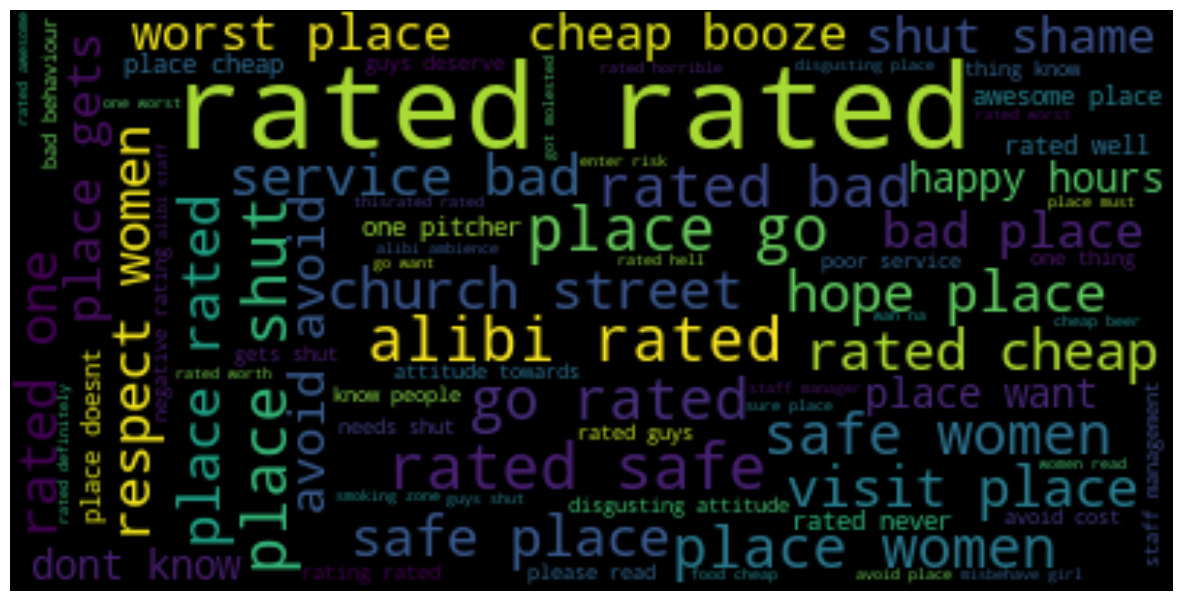

In [72]:
wc = WordCloud().generate(totalSents1)
plt.figure(figsize= (15, 15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [73]:
#Dataframe where rating are greater than 4.8
zom3_df[(zom3_df['Mean Rating'] > 4.8)].shape

(62, 15)

In [74]:
zom3_df_grt4=zom3_df[(zom3_df['Mean Rating'] > 4.8)]
zom3_df_grt4.sample(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Mean Rating
19285,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Belgian Waffle Factory,Yes,No,4.9,1744,Brigade Road,Dessert Parlor,Desserts,400,rated rated waffles totally worth really loved...,[],Delivery,Church Street,4.84
19306,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Belgian Waffle Factory,Yes,No,4.9,1750,Brigade Road,Dessert Parlor,Desserts,400,rated rated looks like theres scam going staff...,"['The Red Wonder Waffle [Bubble]', 'Bubble Kit...",Delivery,MG Road,4.84
19297,"13 KHB Colony, 17th Main, M.I.G, Koramangala 5...",Belgian Waffle Factory,Yes,No,4.8,189,Koramangala 5th Block,Dessert Parlor,Desserts,400,rated rated havent branch ordered waffles yumm...,"['The Red Wonder Waffle [Bubble]', 'Queen Berr...",Delivery,Koramangala 5th Block,4.84
27281,"136, Ground Floor, 1st Cross, 5th Block, Jyoti...",Asia Kitchen By Mainland China,Yes,Yes,4.9,2178,Koramangala 5th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos","1,500",rated rated one chinese restaurant one best ba...,[],Buffet,BTM,4.90
19296,"13 KHB Colony, 17th Main, M.I.G, Koramangala 5...",Belgian Waffle Factory,Yes,No,4.8,187,Koramangala 5th Block,Dessert Parlor,Desserts,400,rated rated havent branch ordered waffles yumm...,[],Desserts,Koramangala 4th Block,4.84


In [75]:
totalWords2 = []
sentences = zom3_df_grt4['reviews_list'].values
totalSents2 = ''
for i in range(0,len(sentences)):
    totalSents2 += sentences[i]
    requiredWords2 = nltk.word_tokenize(totalSents2)
    totalWords2.extend(requiredWords2)   #Using extend to flatten the list else hashable typeerror will come
wordFreqDist = nltk.FreqDist(totalWords2)
mostCommon2 = wordFreqDist.most_common(50)
print(mostCommon2)

[('rated', 620194), ('waffle', 365425), ('place', 325102), ('waffles', 222219), ('good', 200219), ('food', 162828), ('chocolate', 122145), ('bubble', 107202), ('one', 103857), ('service', 99544), ('try', 98116), ('best', 90448), ('visit', 86838), ('ambience', 82240), ('great', 81632), ('really', 81381), ('time', 73346), ('red', 73275), ('belgian', 68812), ('sin', 62023), ('amazing', 61835), ('chicken', 58072), ('tried', 56942), ('like', 55253), ('must', 55044), ('also', 54678), ('would', 54501), ('love', 53464), ('staff', 53326), ('taste', 52160), ('ordered', 51912), ('loved', 51256), ('cream', 50574), ('factory', 42897), ('definitely', 42719), ('well', 42361), ('bangalore', 38947), ('nutella', 37975), ('wonder', 37040), ('perfect', 36828), ('us', 36077), ('go', 35894), ('experience', 35192), ('velvet', 35132), ('made', 34830), ('get', 30562), ('cheese', 30236), ('sweet', 29929), ('friends', 29867), ('nice', 29788)]


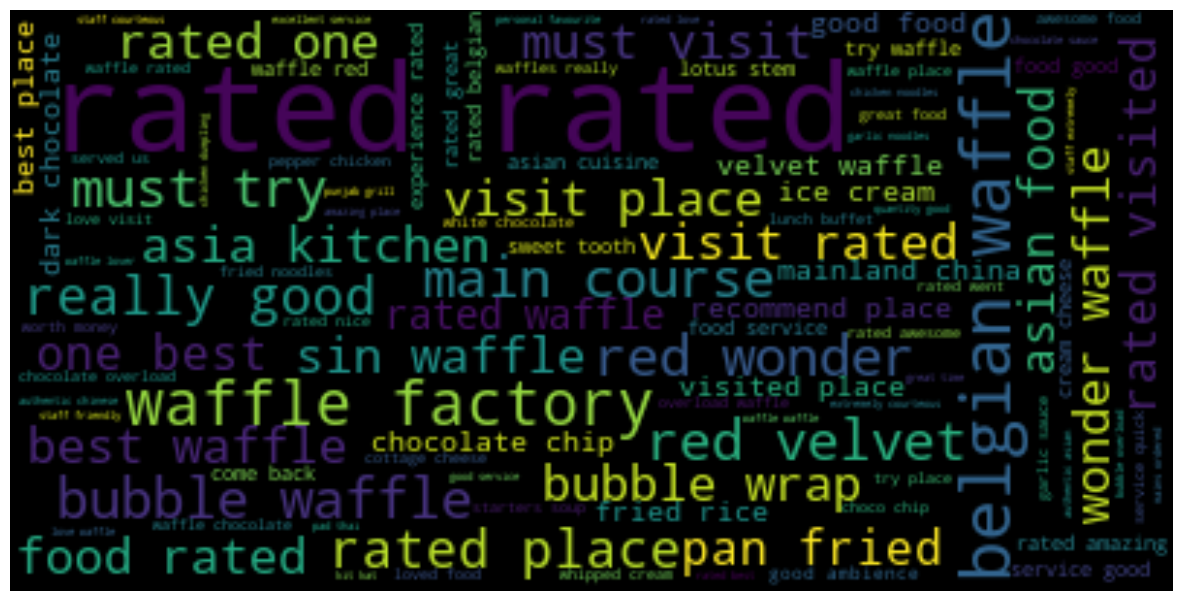

In [76]:
#Creating Wordcloud where rating is greater than 4.8
wc = WordCloud().generate(totalSents2)
plt.figure(figsize= (15, 15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

#### Content Based Recommendation System
Now lets make a recommendations based on the reviews summaries given in the reviews_list column. 
So if our user gives us a restaurant name, our goal is to recommend other restaurant that share similar reviews.

In [77]:
zom3_df.loc[0,'reviews_list']

'rated rated beautiful place dine inthe interiors take back mughal era lightings perfectwe went occasion christmas limited items available taste service compromised allthe complaint breads could betterwould surely like come rated rated dinner family weekday restaurant completely empty ambience good good old hindi music seating arrangement good ordered masala papad panner baby corn starters lemon corrionder soup butter roti olive chilli paratha food fresh good service good good family hangoutcheers rated rated restaurant near banashankari bda along office friends visited buffet unfortunately provide veg buffet inquiring said place mostly visited vegetarians anyways ordered ala carte items took ages come food ok ok definitely visiting anymore rated rated went weekend one us buffet two us took ala carte firstly ambience service place great buffet lot items good good pumpkin halwa intm dessert amazing must try kulchas great cheers rated rated best thing place ambiance second best thing yum

In [78]:
zom4_df=zom3_df

In [79]:
#Creating tf-idf matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
#Setting name as index
zom4_df.set_index('name', inplace=True)

In [94]:
zom4_df.sample(5)

,address,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Mean Rating
name,,,,,,,,,,,,,,
Suryawanshi,"1st Floor, 16, Survey Number 13, Omkar Nagar, ...",Yes,No,3.8,18,Bannerghatta Road,Casual Dining,"Maharashtrian, Seafood",700,rated rated love food please visit suryawanshi...,"['Solo Vegetarian Thali', 'Solo Chicken Thali'...",Dine-out,JP Nagar,4.14
Kickin Burger,"1839, 41st Cross, Putlanpalya, 9th Block, Jaya...",Yes,No,3.1,22,Jayanagar,Quick Bites,Fast Food,400,rated rated one mushrooming food joints servin...,[],Dine-out,JP Nagar,3.10
Shanthi Sagar,"77/1, 24th Main, 2nd Phase, JP Nagar, Bangalore",Yes,No,3.6,518,JP Nagar,Casual Dining,"South Indian, North Indian, Chinese",400,rated rated yummy south indian breakfast shant...,[],Delivery,Basavanagudi,3.69
Food Junction,"13, 10th Cross, Christ School Road, SG Palya, ...",No,No,3.5,42,BTM,Quick Bites,"North Indian, Chinese, Street Food, Biryani",400,rated rated went dinner last night decent meal...,[],Dine-out,BTM,3.52
Momo Rice Noodles,"6, 2nd Floor, Opposite BRS Global School, Kasa...",Yes,No,3.4,68,Sarjapur Road,Quick Bites,"Chinese, Momos",600,rated rated items nonveg noodles fried momosre...,[],Delivery,Bellandur,3.52


In [95]:
# Mapping of indices and restaurant names
indices1 = pd.Series(zom4_df.index)
indices1

0                                                    Jalsa
1                                                    Jalsa
2                                                    Jalsa
3                                                    Jalsa
4                                                    Jalsa
                               ...                        
41826    Chime - Sheraton Grand Bengaluru Whitefield Ho...
41827                         The Nest - The Den Bengaluru
41828                         The Nest - The Den Bengaluru
41829                                        Nawabs Empire
41830                                     SeeYa Restaurant
Name: name, Length: 41831, dtype: object

In [96]:
#Initializing TF-IDF
tfidf1 = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
#Fitting the TF-IDF on the 'reviews_list' text
tfidf_matrix1 = tfidf1.fit_transform(zom4_df['reviews_list'])

In [119]:
tfidf_matrix1.shape

(41831, 1479457)

In [97]:
# Compute the linear kernel
from sklearn.metrics.pairwise import linear_kernel

In [98]:
cosine_similarities = linear_kernel(tfidf_matrix1, tfidf_matrix1)

In [ ]:
#Creating Recommendation

In [120]:
def give_rec(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices1[indices1 == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for i in top30_indexes:
        recommend_restaurant.append(list(zom4_df.index)[i])
    
    # Creating the new data set to show similar restaurants
    zom4_df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'approx_cost(for two people)','location'])
    
    # Create the top 30 similar restaurants with some of their columns
    for i in recommend_restaurant:
        zom4_df_new = zom4_df_new.append(pd.DataFrame(zom4_df[['cuisines','Mean Rating', 'approx_cost(for two people)','location']][zom4_df.index == i].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    zom4_df_new = zom4_df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'approx_cost(for two people)','location'], keep='first')
    zom4_df_new = zom4_df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(zom4_df_new)), name))
    
    return zom4_df_new

In [122]:
give_rec('Eggzotic')

TOP 10 RESTAURANTS LIKE Eggzotic WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,approx_cost(for two people),location
Eggzotic,"North Indian, Chinese, Biryani, Fast Food",3.95,500,Domlur
Savji's Roll 'N' Biryani,"North Indian, Chinese, Biryani, Rolls",3.90,250,Vijay Nagar
Pallavi Restaurant,"Biryani, Chinese, Andhra",3.80,500,Electronic City
B.M.W - Bhookh Mitaane Wala,"North Indian, South Indian, Chinese",3.68,500,Koramangala 1st Block
Marwa Restaurant,"North Indian, Chinese, Fast Food, BBQ",3.50,600,Bannerghatta Road
Desi Dhaba,"North Indian, Chinese, Rolls",3.50,300,Koramangala 7th Block
Eatsomnia,"North Indian, South Indian, Chinese, Continental",3.49,500,JP Nagar
Melange - Hotel Ekaa,"North Indian, Chinese, Continental, Mangalorean",3.20,900,Electronic City
Biriyani Nights,"Biryani, Kebab, Continental",3.08,500,Kammanahalli
Indian Food,"North Indian, Biryani, Chinese, Momos",2.90,450,BTM
